# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [2]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [4]:
# call_on_students(1)

#### Answer: 

- PCA is used to find the features of greatest variance in a dataset. The first PC is a line in the direction of maximum variance. 


### 2: What are some reasons to use PCA?

In [5]:
# call_on_students(1)

#### Answer: 

- PCA can be used to determine the most important features in a dataset, without knowing the corresponding labels (for unsupervised learning). PCA can also be used for pre-processing, by projecting all the features onto the axes of greatest importance (variance).

- REDUCE OVERFITTING AND MODEL COMPLEXITY (less dimensions)


### 3: Why is scaling important for PCA?

In [6]:
# call_on_students(1)

#### Answer: 

- A feature with very large values is more likely to have a wider spread than a feature with smaller values, and will thus be selected as a PC of higher importance.


### 4: How can one determine how many principle components to use in a model?

In [7]:
# call_on_students(1)

#### Answer: 

- The ideal method would be to select the number of principal components that explain a certain percentage of the variance in the dataset. 


## PCA in Code

### Set Up

In [8]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- Scale the data
- Instantiate PCA
- Fit and transform the data with PCA


In [98]:
# call_on_students(1)

In [99]:
# Code to preprocess X


X_scaled = (X - X.mean())/X.std()

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [100]:
# call_on_students(1)

In [102]:
# Code to import, instantiate and fit a PCA object

from sklearn.decomposition import PCA

pca = PCA()

X_scaled_pca = pca.fit(X_scaled)

### 7: How Much Variance is Explained by the First 2 Components?

In [103]:
# call_on_students(1)

In [104]:
# Code here to answer the question

pca.explained_variance_[:2], pca.explained_variance_ratio_[:2]

(array([2.91849782, 0.91403047]), array([0.72962445, 0.22850762]))

#### Answer:

- 44.3% and 18.97%, respectively. Or 13.28 and 5.69, respectively.


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [ ]:
# call_on_students(1)

#### Answer:

- It calculates the distance (many distance metrics exist) between points and the cluster centers, and assigns each point to that cluster center. Then the mean of those points is selected as the next cluster center, and the process is repeated.


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# call_on_students(1)

#### Answer:

- Inertia is a measure of clustering quality, that uses the sum of squared error (distance between point and cluster center) as a metric for a given value of k (# of clusters). A lower inertia means a better estimator.
- The silhouette method is used to determine the best k by plotting the silhouette coefficient (s(i)) against k. Maximizing the coefficient while having a lower k is ideal.


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [ ]:
# call_on_students(1)

#### Answer:

- We can create an elbow plot, that plots inertia against the value of k. The expected best value of k is the point at which the elbow would be, if the plot has an elbow shape


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [88]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- 


In [89]:
# call_on_students(1)

In [91]:
# Code to preprocess the data
# Name the processed data X_processed


X_processed = (X - X.mean())/X.std()

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [92]:
# call_on_students(1)

In [94]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering
iris_cluster = AgglomerativeClustering(n_clusters=2)

In [95]:
# Fit the object
iris_cluster.fit(X_processed)

AgglomerativeClustering()

In [97]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score
pred_iris_clust = iris_cluster.fit_predict(X_processed)
silhouette_score(X_processed, pred_iris_clust)

0.5770346019475988

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [ ]:
# call_on_students(1)

In [ ]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Fit the new clustering model
    
    # Print the silhouette score
    
    # Return the labels attribute from the fit clustering model
    
    pass

In [ ]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

# 3) Time Series

In [18]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- 


In [19]:
# call_on_students(1)

In [34]:
# Code here 

ap['Month'] = pd.to_datetime(ap['Month'])
ap = ap.set_index('Month')

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### 15: Explore Patterns in the Data

In [ ]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- 


Second, plot this time series data. What kinds of patterns do you see in this dataset?

<Axes: xlabel='Month'>

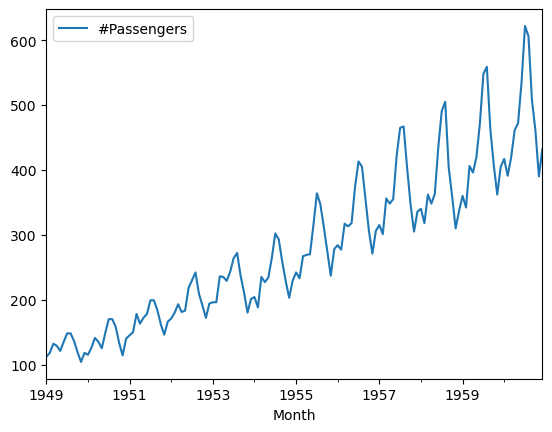

In [35]:
# Code to plot the time series

ap.plot()

### 16: Explore the Moving Average

What window would make sense to use for this data?

- 


In [ ]:
# call_on_students(1)

In [ ]:
# Code to create the moving average

In [ ]:
# Add to the moving average to the above plot

### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- 


What can we do to make our data stationary?

- 


### 18: Check Stationarity

In [ ]:
# call_on_students(1)

In [ ]:
# Code here to check if the data is stationary

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [ ]:
# call_on_students(1)

In [ ]:
# Code here to try to make the data stationary

In [ ]:
# Code here to check if the data is stationary

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [36]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [37]:
# call_on_students(1)

#### Answer:

1. Preprocess: lower case, remove punctuation, remove stop words
2. Apply stemming or lemmitization
3. Tokenize - every pre-processed word is put into a list

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- The individual words would be the column names. The rows would be the sentence (or document). The values would be the number of instances of said word in the given sentence (or document)


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- Term Frequency-Inverse Document Frequency is a measure of the significance of a word in a given document. This can be used to classify a document if the prevalence of these words matches that of the category.


## NLP in Code

### Set Up

In [38]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [42]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [40]:
# call_on_students(1)

In [79]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split

X = policies['policy']
y = policies['candidate']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [80]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [81]:
# Instantiate it
vec = CountVectorizer()

In [82]:
# Fit it
vec.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [83]:
# call_on_students(1)

In [84]:
# Code here to transform train and test sets with the vectorizer

X_train_transformed = vec.transform(X_train)
X_test_transformed = vec.transform(X_test)
# y_train_transformed = vec.transform(y_train)
# y_test_transformed = vec.transform(y_test)

In [85]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rfc = RandomForestClassifier()

In [87]:
# Code here to evaluate your model on the test set
from sklearn.model_selection import cross_val_score

rfc.fit(X_train_transformed, y_train)

y_pred = rfc.predict(X_test_transformed)

cross_val_score(rfc, X_test_transformed, y_test)

array([0.8       , 0.8       , 0.8       , 0.88888889, 0.88888889])